<a href="https://colab.research.google.com/github/nikhilRajput-prog/Deep-Learning-Lab-File/blob/main/Deep_Learning_Experiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Experiment 2 : Neural Network from Scratch using Numpy on MNIST dataset

Loading MNIST data...
Epoch 1/10 | Loss: 0.2863 | Accuracy: 91.93%
Epoch 2/10 | Loss: 0.2067 | Accuracy: 93.93%
Epoch 3/10 | Loss: 0.1620 | Accuracy: 94.98%
Epoch 4/10 | Loss: 0.1327 | Accuracy: 95.80%
Epoch 5/10 | Loss: 0.1122 | Accuracy: 96.36%
Epoch 6/10 | Loss: 0.0973 | Accuracy: 96.77%
Epoch 7/10 | Loss: 0.0858 | Accuracy: 96.94%
Epoch 8/10 | Loss: 0.0772 | Accuracy: 97.07%
Epoch 9/10 | Loss: 0.0697 | Accuracy: 97.21%
Epoch 10/10 | Loss: 0.0635 | Accuracy: 97.30%




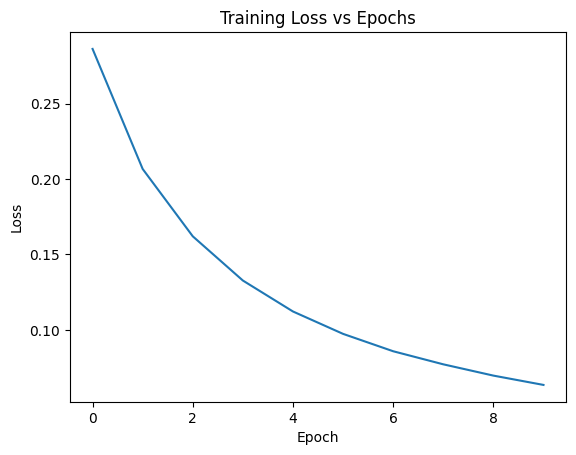

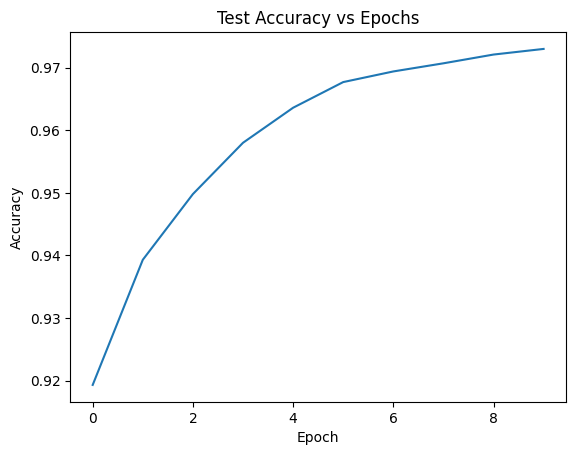

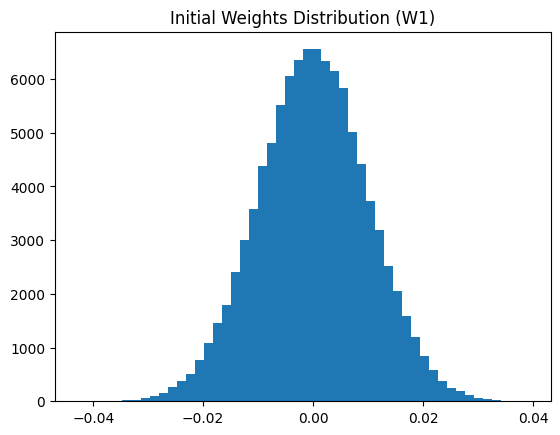

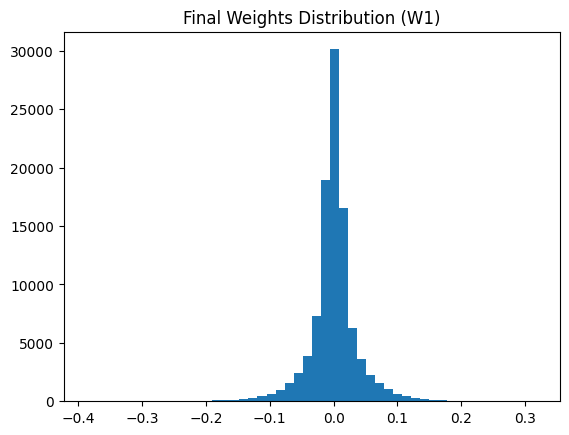

In [6]:
import numpy as np
import struct
import matplotlib.pyplot as plt

# ==============================
# MNIST DATA LOADING FUNCTIONS
# ==============================

def load_images(file_path):
    with open(file_path, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8)
        images = images.reshape(num_images, rows * cols)
        images = images / 255.0
    return images


def load_labels(file_path):
    with open(file_path, 'rb') as f:
        magic, num_labels = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels


def one_hot_encode(labels, num_classes=10):
    one_hot = np.zeros((labels.size, num_classes))
    one_hot[np.arange(labels.size), labels] = 1
    return one_hot


# ==============================
# ACTIVATION FUNCTIONS
# ==============================

def relu(z):
    return np.maximum(0, z)


def relu_derivative(z):
    return z > 0


def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


# ==============================
# LOSS FUNCTION
# ==============================

def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-8)) / m


# ==============================
# NEURAL NETWORK CLASS
# ==============================

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.lr = learning_rate

        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))

        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

        # Store initial weights for visualization
        self.W1_initial = self.W1.copy()

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)

        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = softmax(self.Z2)

        return self.A2

    def backward(self, X, y_true):
        m = X.shape[0]

        dZ2 = self.A2 - y_true
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Weight update (Gradient Descent)
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

    def predict(self, X):
        probs = self.forward(X)
        return np.argmax(probs, axis=1)


# ==============================
# TRAINING FUNCTION
# ==============================

def train():
    print("Loading MNIST data...")

    X_train = load_images("train-images.idx3-ubyte")
    y_train = load_labels("train-labels.idx1-ubyte")
    X_test  = load_images("t10k-images.idx3-ubyte")
    y_test  = load_labels("t10k-labels.idx1-ubyte")

    y_train_oh = one_hot_encode(y_train)

    nn = NeuralNetwork(784, 128, 10, learning_rate=0.1)

    epochs = 10
    batch_size = 64

    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train_oh[i:i + batch_size]

            nn.forward(X_batch)
            nn.backward(X_batch, y_batch)

        # Metrics
        train_loss = cross_entropy_loss(y_train_oh, nn.forward(X_train))
        predictions = nn.predict(X_test)
        accuracy = np.mean(predictions == y_test)

        loss_history.append(train_loss)
        accuracy_history.append(accuracy)

        print(f"Epoch {epoch+1}/{epochs} | Loss: {train_loss:.4f} | Accuracy: {accuracy*100:.2f}%")

    # ==============================
    # VISUALIZATION
    # ==============================

    # 1️⃣ Loss Curve
    print("\n")
    plt.figure()
    plt.plot(loss_history)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Epochs")
    plt.show()

    # 2️⃣ Accuracy Curve
    print("\n")
    plt.figure()
    plt.plot(accuracy_history)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Test Accuracy vs Epochs")
    plt.show()

    # 3️⃣ Weight Change Visualization
    print("\n")
    plt.figure()
    plt.hist(nn.W1_initial.flatten(), bins=50)
    plt.title("Initial Weights Distribution (W1)")
    plt.show()

    plt.figure()
    plt.hist(nn.W1.flatten(), bins=50)
    plt.title("Final Weights Distribution (W1)")
    plt.show()


# ==============================
# MAIN
# ==============================

if __name__ == "__main__":
    train()